In [ ]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

In [6]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_data, test_data = dataset["train"], dataset["test"]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteOMIOEG/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteOMIOEG/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
dataset

{Split('train'): <PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('test'): <PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [8]:
classes = ['tshirt', 'trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
train_ex = metadata.splits['train'].num_examples
test_ex = metadata.splits['test'].num_examples
print(train_ex)
print(test_ex)

60000
10000


In [10]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_data.map(normalize)
test_dataset = test_data.map(normalize)

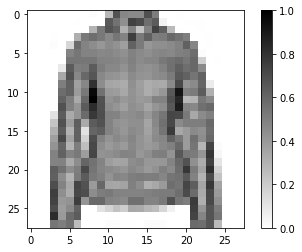

In [11]:
# For one image
for image,label in test_dataset.take(4):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

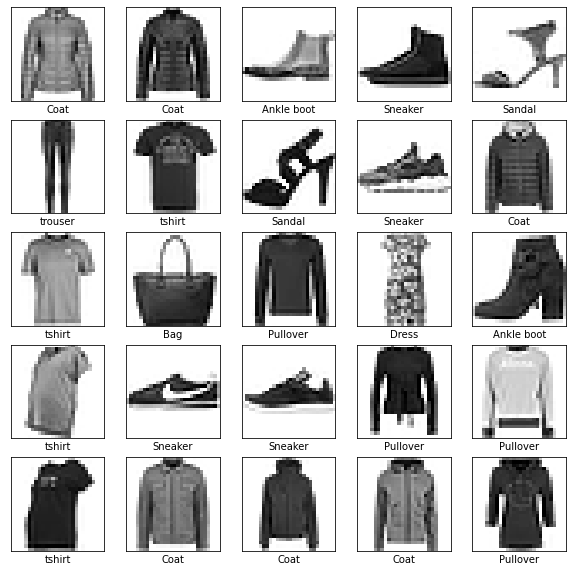

In [12]:
# For 25 images
plt.figure(figsize = (10,10))
i = 0
for (image,label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap= plt.cm.binary)
  plt.xlabel(classes[label])
  i+=1

plt.show()


In [13]:
# setup model 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28,1)),
    tf.keras.layers.Dense(128, activation =tf.nn.relu),
    tf.keras.layers.Dense(10, activation =tf.nn.softmax)
])

In [14]:
# compile model
model.compile(loss= "sparse_categorical_crossentropy", optimizer= 'adam',
              metrics =['accuracy'])

In [15]:
Batch_size = 32
train_dataset = train_dataset.repeat().shuffle(train_ex).batch(Batch_size)
test_dataset = test_dataset.batch(Batch_size)

In [16]:
# Predictions
model.fit(train_dataset, epochs=5, steps_per_epoch= math.ceil(train_ex/Batch_size))

Epoch 1/5
1875/1875 [==============================] - 16s 5ms/step - loss: 0.4934 - accuracy: 0.8259
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3793 - accuracy: 0.8633
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3377 - accuracy: 0.8785
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3135 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2983 - accuracy: 0.8889


In [17]:
# Evaluation 
test_loss , test_accuracy = model.evaluate(test_dataset, steps= math.ceil(test_ex/32))
print(test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3764 - accuracy: 0.8655
0.8654999732971191


In [18]:
# Predictions
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 97ms/step


In [19]:
predictions.shape

(32, 10)

In [20]:
np.argmax(predictions[0])

4

In [21]:
test_labels[0]

4

In [27]:
# plotting an image
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = "blue"
  else:
    color = "red"
  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                       100*np.max(predictions_array),
                                       classes[true_label]),
                                       color = color)

def plot_value_array(i,predictions_array, true_label):
  predictions_array, true_label  = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array)
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("blue")

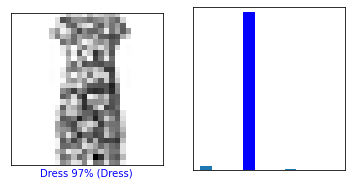

In [33]:
i = 13
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i , predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions, test_labels)

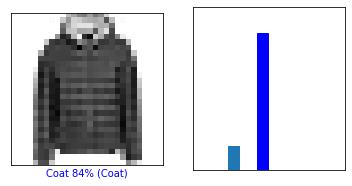

In [34]:
i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i , predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions, test_labels)

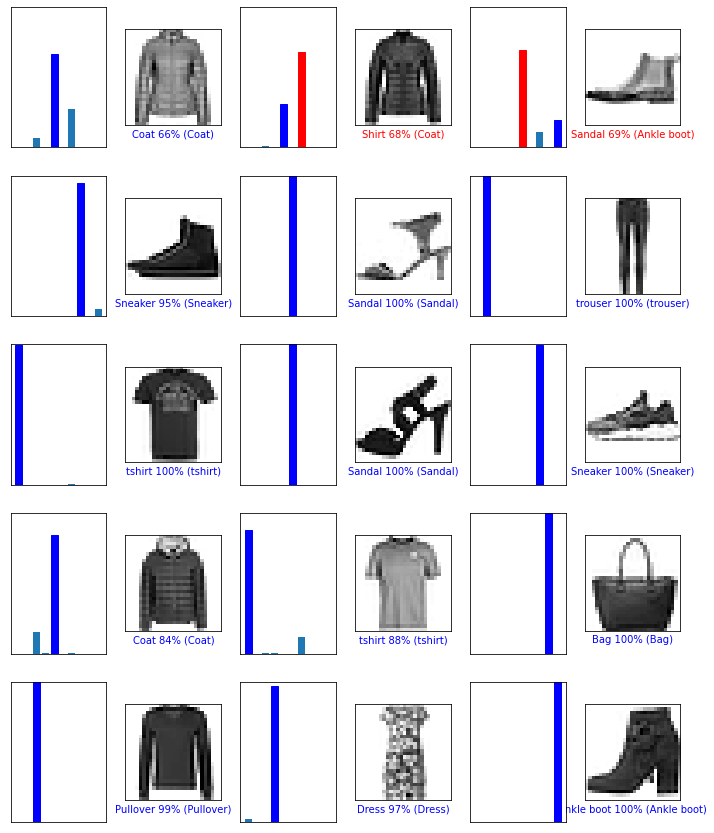

In [63]:
rows = 5
columns = 3
num_images = rows*columns
plt.figure(figsize = (4*columns, 3*rows))
for i in range(num_images):
  plt.subplot(rows, 2*columns , 2*i+2)
  plot_image(i, predictions, test_labels , test_images)
  plt.subplot(rows,2*columns, 2*i+1)
  plot_value_array(i,predictions, test_labels)

In [70]:
img = test_images[1]
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [71]:
singular_prediction = model.predict(img)
singular_prediction

1/1 [==============================] - 0s 31ms/step


array([[2.5638526e-06, 1.0472221e-09, 1.0592004e-02, 3.5146849e-07,
        3.0992377e-01, 1.1979057e-09, 6.7948115e-01, 1.0874588e-09,
        1.9101869e-07, 4.5561738e-10]], dtype=float32)

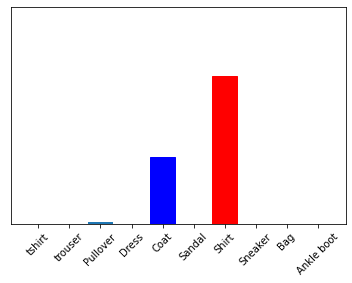

In [72]:
plot_value_array(0,singular_prediction, test_labels)
_ = plt.xticks(range(10), classes, rotation = 45)